In [378]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [379]:
import numpy as np
import pandas as pd

In [380]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [381]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [382]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [383]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [384]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [385]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [386]:
#Set a start and end date for trip 3 to 15 days
#01-01-17 to 01-05-17 (not sure why?)


In [387]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [388]:
#inspect station columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [389]:
# View what the information looks like in those columns
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [390]:
#inspect how the dates are formatted
sample_dates = session.query(Measurement.date).limit(5).all()
for result in sample_dates:
    print(result)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


# Exploratory Climate Analysis

In [391]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find the last date in the data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [392]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [393]:
# Perform a query to retrieve the data and precipitation scores
yr_precip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24', Measurement.date <= '2017-08-23').\
        order_by(Measurement.date).all()
yr_precip

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [400]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yr_precip_df = pd.DataFrame(data=yr_precip)
yr_precip_df.head(15)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


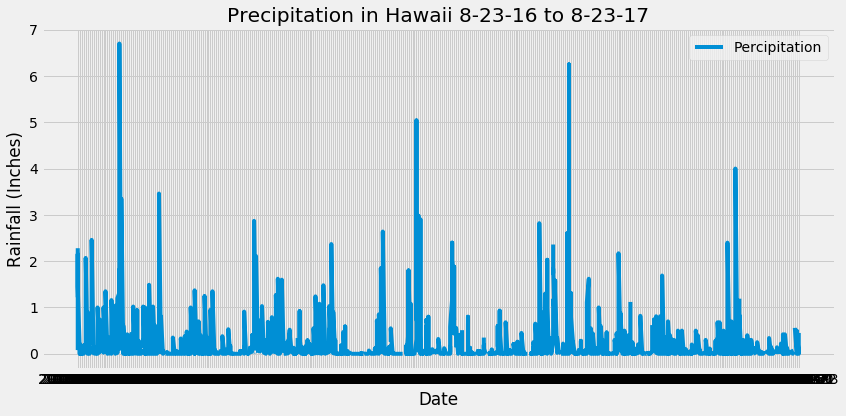

In [401]:
# Use Pandas Plotting with Matplotlib to plot the data
df=pd.DataFrame(data=yr_precip)
plt.figure(figsize = (12,6))
plt.plot(df['date'], df['prcp'])
plt.title("Precipitation in Hawaii 8-23-16 to 8-23-17")
plt.xlabel('Date')
plt.ylabel('Rainfall (Inches)')
plt.legend(['Percipitation'])
plt.tight_layout()
plt.savefig("Images/Precipitation.png")
plt.show()




In [402]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yr_precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [403]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [404]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [407]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for most active station
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
session.query(*sel).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

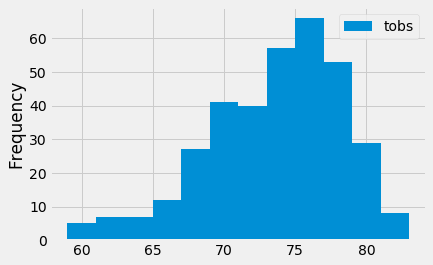

In [406]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= one_year_ago).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.savefig("Images/station-histogram.png")
plt.show()




In [276]:
#Optional Temp Analyis 1


In [279]:

# Optional Temp Analysis 2


# The starter notebook contains a function called `calc_temps` that will accept a start date and end date 
# in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

# * Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip 
# using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

def calc_temps(start_date, end_date):
    temp_stats = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                 filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return temp_stats
temp_stats_list = calc_temps('2017-01-01','2017-01-05')
print(temp_stats_list)

[(62.0, 68.13793103448276, 74.0)]


<BarContainer object of 1 artists>

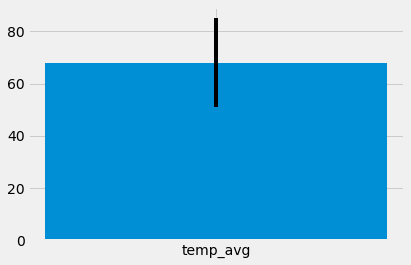

In [239]:
 # Plot the min, avg, and max temperature from your previous query as a bar chart.

#   * Use the average temperature as the bar height.

#   * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
x = 'temp_avg'
plt.bar(x=x,height= temp_stats_list[0][1],yerr =(temp_stats_list[0][2]- temp_stats_list[0][0]) )

In [240]:
Daily Rainfall Average

#   * Calculate the rainfall per weather station using the previous year's matching dates.
rain_query = session.query(Measurement.station, func.avg(Measurement.prcp)).\
             filter(Measurement.date>='2016-01-01').filter(Measurement.date<'2017-01-01').\
             group_by(Measurement.station).all()
rain_query

[('USC00513117', 0.14248633879781428),
 ('USC00514830', 0.09410344827586206),
 ('USC00516128', 0.5105956112852665),
 ('USC00517948', 0.07615384615384617),
 ('USC00519281', 0.21827868852459018),
 ('USC00519397', 0.04436813186813186),
 ('USC00519523', 0.09467692307692305)]

In [241]:
# * Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

#   * You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

#   * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

#   * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

#   * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

def daily_normals(inputdate):
    daily_normals_query = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                          filter(Measurement.date == func.strftime("%Y-%m-%d",inputdate)).all()
    return daily_normals_query

daily_normals('2017-08-20')

[(78.0, 79.66666666666667, 81.0)]

In [242]:
date_list = ['2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05']
daily_normals_list = []
for date in date_list:
    temp_stat = daily_normals(date)
    daily_normals_list.append(temp_stat)
daily_normals_list

[[(62.0, 69.33333333333333, 74.0)],
 [(66.0, 69.2, 74.0)],
 [(63.0, 67.66666666666667, 73.0)],
 [(62.0, 67.16666666666667, 73.0)],
 [(63.0, 67.5, 72.0)]]

In [243]:
tMin_list = []
tMax_list = []
tAvg_list = []
for row in daily_normals_list:
    tMin_list.append(row[0][0])
    tAvg_list.append(row[0][1])
    tMax_list.append(row[0][2])
tMin_list
tAvg_list
tMax_list

[74.0, 74.0, 73.0, 73.0, 72.0]

In [244]:
df = pd.DataFrame({"Date":date_list,
                  "TMin":tMin_list,
                  "TMax":tMax_list,
                  "TAvg":tAvg_list})
df

,Date,TMin,TMax,TAvg
0,2017-01-01,62.0,74.0,69.333333
1,2017-01-02,66.0,74.0,69.200000
2,2017-01-03,63.0,73.0,67.666667
3,2017-01-04,62.0,73.0,67.166667
4,2017-01-05,63.0,72.0,67.500000


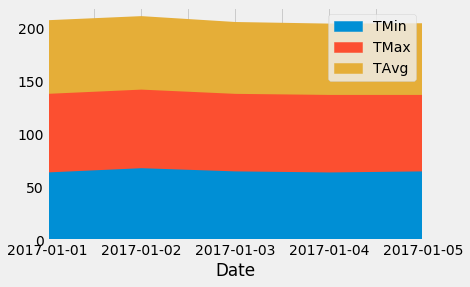

In [245]:
df.plot(kind="area",x='Date',y=['TMin','TMax','TAvg'],stacked='False')